In [6]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os

In [7]:
mnist = tf.keras.datasets.mnist

In [32]:
# X data is pixel data
# y no of the digit
(x_train,y_train),(x_test,y_test) = mnist.load_data()

In [33]:
# scaling to low value
x_train = tf.keras.utils.normalize(x_train,axis=1)

In [34]:
# scaling to low value
x_test = tf.keras.utils.normalize(x_test,axis=1)

In [37]:
# model
model = tf.keras.models.Sequential()

In [38]:
# Layers
model.add(tf.keras.layers.Flatten(input_shape=(28,28)))

In [39]:
#relu = rectify liner unit 0 = infi linear
model.add(tf.keras.layers.Dense(128,activation='relu'))


In [40]:
model.add(tf.keras.layers.Dense(128,activation='relu'))
model.add(tf.keras.layers.Dense(10,activation='softmax'))


In [41]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [42]:
model.fit(x_train,y_train, epochs=3)

Epoch 1/3
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2675 - accuracy: 0.9202
Epoch 2/3
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1111 - accuracy: 0.9653
Epoch 3/3
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0742 - accuracy: 0.9763


In [43]:
model.save('Handwriting.model')

INFO:tensorflow:Assets written to: Handwriting.model\assets


INFO:tensorflow:Assets written to: Handwriting.model\assets


In [44]:
model1 = tf.keras.models.load_model('Handwriting.model')

In [47]:
loss, accuracy = model1.evaluate(x_test,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0937 - accuracy: 0.9709


In [49]:
loss,accuracy

(0.09366322308778763, 0.9708999991416931)

# Testing model

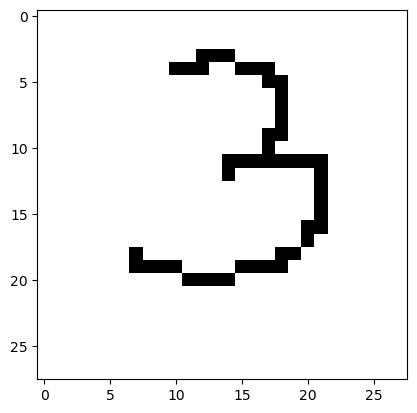

In [92]:
img = cv2.imread('digitalNum3.png')[:,:,0]
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))

In [93]:
img = np.invert(np.array([img]))
pred = model1.predict(img)
print("the predicted number is::",np.argmax(pred))

1/1 [==============================] - 0s 95ms/step
the predicted number is:: 3


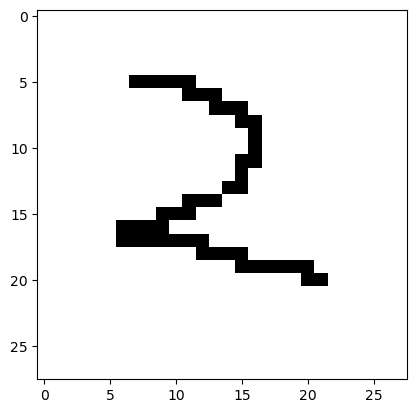

In [94]:
img2 = cv2.imread('digitalNum2.png')[:,:,0]
plt.imshow(cv2.cvtColor(img2,cv2.COLOR_BGR2RGB))

In [95]:
img2 = np.invert(np.array([img2]))
pred = model1.predict(img2)
print("the predicted number is:::",np.argmax(pred))

1/1 [==============================] - 0s 98ms/step
the predicted number is::: 2
